# JOB CHANGE

In [ ]:
import pandas as pd
df=pd.read_csv("aug_train.csv")

In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


# data-preprocessing

In [ ]:
df = df[df.experience.notnull()]

In [ ]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4459
relevent_experience          0
enrolled_university        381
education_level            450
major_discipline          2796
experience                   0
company_size              5915
company_type              6104
last_new_job               399
training_hours               0
target                       0
dtype: int64

In [ ]:
df = df[df.last_new_job.notnull()]

In [ ]:
df.value_counts("company_size")

company_size
50-99        3030
100-500      2534
10000+       1986
10/49        1433
1000-4999    1305
<10          1275
500-999       862
5000-9999     552
dtype: int64

In [ ]:
df["company_size"].fillna((50-99), inplace=True)

In [ ]:
df.value_counts("company_type")

company_type
Pvt Ltd                9680
Funded Startup          990
Public Sector           935
Early Stage Startup     584
NGO                     511
Other                   116
dtype: int64

In [ ]:
df["company_type"].fillna((9680), inplace=True)

In [ ]:
df.value_counts("major_discipline")

major_discipline
STEM               14187
Humanities           662
Other                368
Business Degree      324
Arts                 250
No Major             216
dtype: int64

In [ ]:
df["major_discipline"].fillna(("STEM"), inplace=True)

In [ ]:
df.value_counts("gender")

gender
Male      13144
Female     1232
Other       188
dtype: int64

In [ ]:
df["gender"].fillna(("Other"), inplace=True)

In [ ]:
df.value_counts("education_level")

education_level
Graduate          11347
Masters            4278
High School        1951
Phd                 405
Primary School      299
dtype: int64

In [ ]:
df["education_level"].fillna(("Graduate"), inplace=True)

In [ ]:
df.value_counts("enrolled_university")

enrolled_university
no_enrollment       13600
Full time course     3578
Part time course     1167
dtype: int64

In [ ]:
df["enrolled_university"].fillna(("no_enrollment"), inplace=True)

In [ ]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
def func(ch):
    return ch.split('_')[1]

In [ ]:
df["city"]= df["city"].map(func)

In [ ]:
df.value_counts("city")

city
103    4283
21     2575
16     1518
114    1309
160     833
       ... 
121       3
129       3
166       3
140       1
171       1
Length: 123, dtype: int64

In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,-49,9680,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,-49,9680,never,83,0.0
3,33241,115,0.789,Other,No relevent experience,no_enrollment,Graduate,Business Degree,<1,-49,Pvt Ltd,never,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,-49,9680,1,42,1.0
19154,31398,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,-49,9680,4,52,1.0
19155,24576,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18694 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18694 non-null  int64  
 1   city                    18694 non-null  object 
 2   city_development_index  18694 non-null  float64
 3   gender                  18694 non-null  object 
 4   relevent_experience     18694 non-null  object 
 5   enrolled_university     18694 non-null  object 
 6   education_level         18694 non-null  object 
 7   major_discipline        18694 non-null  object 
 8   experience              18694 non-null  object 
 9   company_size            18694 non-null  object 
 10  company_type            18694 non-null  object 
 11  last_new_job            18694 non-null  object 
 12  training_hours          18694 non-null  int64  
 13  target                  18694 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()

In [ ]:
df['gender']=le1.fit_transform(df['gender'])

In [ ]:
df.value_counts("relevent_experience")

relevent_experience
Has relevent experience    13542
No relevent experience      5152
dtype: int64

In [ ]:
le2 = preprocessing.LabelEncoder()
df['relevent_experience']=le2.fit_transform(df['relevent_experience'])

In [ ]:
df.value_counts("enrolled_university")

enrolled_university
no_enrollment       13949
Full time course     3578
Part time course     1167
dtype: int64

In [ ]:
le3 = preprocessing.LabelEncoder()
df['enrolled_university']=le3.fit_transform(df['enrolled_university'])

In [ ]:
df.value_counts("education_level")

education_level
Graduate          11761
Masters            4278
High School        1951
Phd                 405
Primary School      299
dtype: int64

In [ ]:
le4 = preprocessing.LabelEncoder()
df['education_level']=le4.fit_transform(df['education_level'])

In [ ]:
df.value_counts("major_discipline")

major_discipline
STEM               16874
Humanities           662
Other                368
Business Degree      324
Arts                 250
No Major             216
dtype: int64

In [ ]:
le5 = preprocessing.LabelEncoder()
df['major_discipline']=le5.fit_transform(df['major_discipline'])

In [ ]:
df.value_counts("experience")

experience
>20    3253
5      1396
4      1350
3      1296
6      1194
2      1090
7      1013
10      977
9       965
8       790
15      684
11      659
14      582
1       517
16      500
12      488
<1      484
13      394
17      340
19      299
18      276
20      147
dtype: int64

In [ ]:
le6 = preprocessing.LabelEncoder()
df['experience']=le6.fit_transform(df['experience'])

In [ ]:
df.value_counts("company_size")

company_size
-49          5717
50-99        3030
100-500      2534
10000+       1986
10/49        1433
1000-4999    1305
<10          1275
500-999       862
5000-9999     552
dtype: int64

In [ ]:
company_nums={"company_size": { -49: 0 ,"50-99":1 ,"100-500":2 ,"10000+":3 ,"10/49":4 ,"1000-4999":5 ,"<10":6 ,"500-999":7 ,"5000-9999":8}
}
df.replace(company_nums, inplace=True)

In [ ]:
df.value_counts("company_size")

company_size
0    5717
1    3030
2    2534
3    1986
4    1433
5    1305
6    1275
7     862
8     552
dtype: int64

In [ ]:
df.value_counts("company_type")

company_type
Pvt Ltd                9680
9680                   5878
Funded Startup          990
Public Sector           935
Early Stage Startup     584
NGO                     511
Other                   116
dtype: int64

In [ ]:
cleanup_nums={"company_type":{"Pvt Ltd":0, 9680: 1,"Funded Startup":2 ,"Public Sector":3,"Early Stage Startup":4,"NGO":5,"Other":6}}
df.replace(cleanup_nums, inplace=True)

In [ ]:
df.value_counts("company_type")

company_type
0    9680
1    5878
2     990
3     935
4     584
5     511
6     116
dtype: int64

In [ ]:
df.value_counts("last_new_job")

last_new_job
1        8019
>4       3283
2        2897
never    2444
4        1028
3        1023
dtype: int64

In [ ]:
le7 = preprocessing.LabelEncoder()
df['last_new_job']=le7.fit_transform(df['last_new_job'])

In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,1,0,2,0,5,21,0,1,0,36,1.0
1,29725,40,0.776,1,1,2,0,5,6,1,0,4,47,0.0
2,11561,21,0.624,2,1,0,0,5,15,0,1,5,83,0.0
3,33241,115,0.789,2,1,2,0,1,20,0,0,5,52,1.0
4,666,162,0.767,1,0,2,2,5,21,1,2,3,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,1,1,2,0,2,5,0,1,0,42,1.0
19154,31398,103,0.920,1,0,2,0,5,5,0,1,3,52,1.0
19155,24576,103,0.920,1,0,2,0,5,21,1,0,3,44,0.0
19156,5756,65,0.802,1,0,2,1,5,20,7,0,1,97,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18694 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18694 non-null  int64  
 1   city                    18694 non-null  object 
 2   city_development_index  18694 non-null  float64
 3   gender                  18694 non-null  int32  
 4   relevent_experience     18694 non-null  int32  
 5   enrolled_university     18694 non-null  int32  
 6   education_level         18694 non-null  int32  
 7   major_discipline        18694 non-null  int32  
 8   experience              18694 non-null  int32  
 9   company_size            18694 non-null  int64  
 10  company_type            18694 non-null  int64  
 11  last_new_job            18694 non-null  int32  
 12  training_hours          18694 non-null  int64  
 13  target                  18694 non-null  float64
dtypes: float64(2), int32(7), int64(4), obj

In [ ]:
df.value_counts("experience")

experience
21    3253
15    1396
14    1350
13    1296
16    1194
11    1090
17    1013
1      977
19     965
18     790
6      684
2      659
5      582
0      517
7      500
3      488
20     484
4      394
8      340
10     299
9      276
12     147
dtype: int64

In [ ]:
le8 = preprocessing.LabelEncoder()
df['experience']=le8.fit_transform(df['experience'])

In [ ]:
le9 = preprocessing.LabelEncoder()
df['target']=le9.fit_transform(df['target'])

In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,1,0,2,0,5,21,0,1,0,36,1
1,29725,40,0.776,1,1,2,0,5,6,1,0,4,47,0
2,11561,21,0.624,2,1,0,0,5,15,0,1,5,83,0
3,33241,115,0.789,2,1,2,0,1,20,0,0,5,52,1
4,666,162,0.767,1,0,2,2,5,21,1,2,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,1,1,2,0,2,5,0,1,0,42,1
19154,31398,103,0.920,1,0,2,0,5,5,0,1,3,52,1
19155,24576,103,0.920,1,0,2,0,5,21,1,0,3,44,0
19156,5756,65,0.802,1,0,2,1,5,20,7,0,1,97,0


# data-visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 14 , 14 ) )
    cmap = sns.diverging_palette( 220 , 14 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

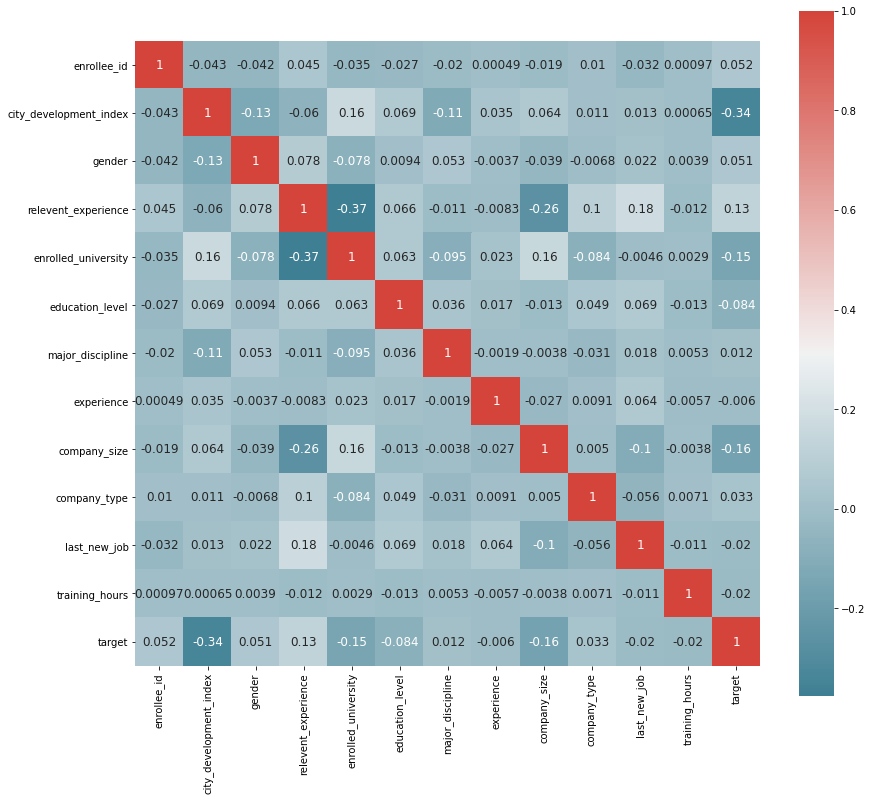

In [ ]:
plot_correlation_map(df)

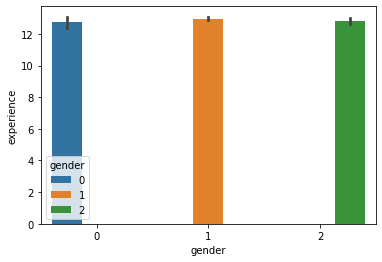

In [ ]:
ax = sns.barplot(x="gender", y="experience", hue="gender", data=df)


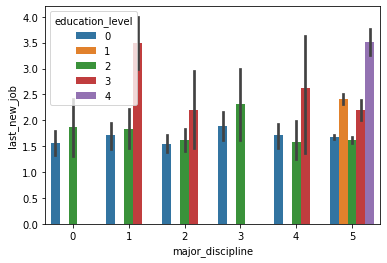

In [ ]:
g = sns.barplot(x="major_discipline", y="last_new_job",hue="education_level", data=df);

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=df[["company_size","city"]]
df1["company_size"]=scaler.fit_transform(df1[["company_size"]].values)
df1["city"]=scaler.fit_transform(df1[["city"]].values)

<ipython-input-58-94cb788ff4c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["company_size"]=scaler.fit_transform(df1[["company_size"]].values)
<ipython-input-58-94cb788ff4c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["city"]=scaler.fit_transform(df1[["city"]].values)


<AxesSubplot:>

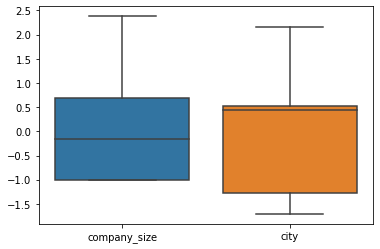

In [ ]:
sns.boxplot(data=df1)


# Machine learning

In [ ]:
from sklearn.model_selection import train_test_split
x=df[["city_development_index","gender","relevent_experience","education_level","company_size","enrolled_university","experience","company_type"]]  
y=df["target"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.77


In [ ]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)  
y_pred=tree.predict(x_test)   
print("Accuracy:{}".format(accuracy_score(y_test, y_pred)))

Accuracy:0.7274672372292057


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.7592939288579834


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test) 
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.7646429526611394


In [ ]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.76
Accuracy for k= 2 is: 0.76
Accuracy for k= 3 is: 0.76
Accuracy for k= 4 is: 0.77
Accuracy for k= 5 is: 0.76
Accuracy for k= 6 is: 0.77
Accuracy for k= 7 is: 0.76
Accuracy for k= 8 is: 0.77
Accuracy for k= 9 is: 0.77
Accuracy for k= 10 is: 0.77
Accuracy for k= 11 is: 0.77
Accuracy for k= 12 is: 0.76
Accuracy for k= 13 is: 0.76
Accuracy for k= 14 is: 0.76
Accuracy for k= 15 is: 0.76
Accuracy for k= 16 is: 0.76
Accuracy for k= 17 is: 0.76
Accuracy for k= 18 is: 0.76
Accuracy for k= 19 is: 0.76
Accuracy for k= 20 is: 0.76
Accuracy for k= 21 is: 0.76
Accuracy for k= 22 is: 0.76
Accuracy for k= 23 is: 0.76
Accuracy for k= 24 is: 0.76
Accuracy for k= 25 is: 0.75
Accuracy for k= 26 is: 0.76
Accuracy for k= 27 is: 0.75
Accuracy for k= 28 is: 0.76
Accuracy for k= 29 is: 0.7


Text(0, 0.5, 'Testing Accuracy')

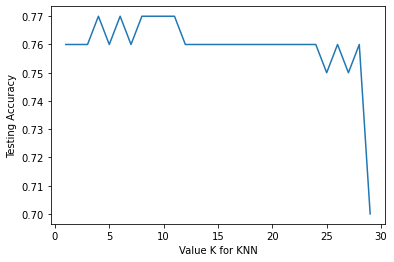

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
x=df[["city","city_development_index","relevent_experience", "enrolled_university", "education_level", "company_size"]]  
y=df["target"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.77


In [ ]:
x=df[["city","city_development_index","relevent_experience", "enrolled_university", "education_level", "company_size"]]  
y=df["target"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

In [ ]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)  
y_pred=tree.predict(x_test)   
print("Accuracy:{}".format(accuracy_score(y_test, y_pred)))

Accuracy:0.7697245252741375


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.7753410002674512


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test) 
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.7790853169296603


Text(0, 0.5, 'Testing Accuracy')

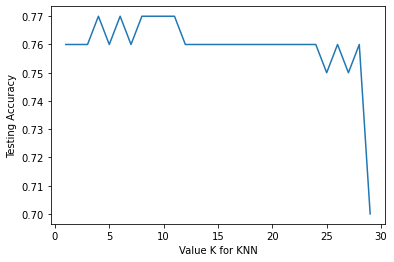

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
#l'algorithme choisi est le RandomForestClassifier 

In [ ]:
x=df[["city","city_development_index","relevent_experience", "enrolled_university", "education_level", "company_size"]]  
y=df["target"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier 
model=RandomForestClassifier(n_estimators=10)  
model.fit(x_train, y_train) 
y_pred=model.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.7804225728804494


In [ ]:
filename = 'fmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import pickle
loaded_model = pickle.load(open('fmodel.sav', 'rb'))

In [ ]:
def getInfo():
    print('city: ')
    city=int(input())
    print('city_development_index: ')
    city_development_index=input()
    print('relevent_experience: ')
    relevent_experience=le2.transform([input()])
    print('enrolled_university: ')
    enrolled_university=le3.transform([input()])
    print('education_level: ')
    education_level=le4.transform([input()])
    print('company_size')
    company_size=input()

In [ ]:
def resPrediction():
    getInfo()
    res=loaded_model.predict([[city,city_development_index,relevent_experience,enrolled_university,education_level,company_size]])
    if res==0:
        print('Not looking for job change')
    else:
        print('Looking for a job change')

In [ ]:
resPrediction()

city: 
40
city_development_index: 
0.776
relevent_experience: 
No relevent experience
enrolled_university: 
no_enrollment
education_level: 
Graduate
company_size
1
Not looking for job change
